# Exploring Universality in Topological Deep Learning for Representation of Topological Domains, a DeepWalk Study Case

Topological Deep Learning (TDL) has emerged as a powerful framework for representation learning, particularly for complex structures like cell or simplicial complexes. A fundamental aspect of TDL is its universality - the capability of a single algorithm to embed elements within various topological domains. The terms topological domain is an umberlla term here that encampuses various domains : (hypergraph)graphs and simplicial/cell/combinatorial complexes.

We start by recalling the DeepWalk algorithm.


### What is DeepWalk?
DeepWalk is a popular technique for unsupervised representation learning of nodes in a network or graph. It was introduced by Perozzi et al. in 2014, aiming to generate continuous vector representations (embeddings) for nodes in a graph. These embeddings preserve structural information, allowing machine learning models to operate on graph data efficiently.

DeepWalk is based on the skip-gram model, originally used in natural language processing. Instead of sentences and words, DeepWalk uses sequences of nodes obtained by random walks on the graph. The core idea is to treat each random walk as a sentence and each node in the walk as a word. By training a skip-gram model on these walks, DeepWalk learns embeddings that capture the graph's topological features



## Embedding Cells of Different Dimensions using DeepCell

**Introduction:**
DeepCell, an extension of the DeepWalk concept for topological domains such as cell/simplicial/combinatorial complexes. In this example we provide an explaination of the topological rep learning algorithm by embedding a 2-dimensional cell complex whose. Understanding how DeepCell operates at these (0,1,2) is essential to appreciate its adaptability and effectiveness in capturing topological features.

**1. Embedding 0-Dimensional Cells (Vertices):**
In the context of cell or simplicial complexes, 0-dimensional cells correspond to vertices or zero-dimensional simplices. These vertices represent fundamental entities within the complex. DeepCell can embed vertices by treating them as nodes in a graph. Random walks within the complex then mimic traversing 'sentences' composed of 'words' (vertices). DeepCell learns embeddings for vertices by applying techniques similar to skip-gram models, capturing local and global topological relationships around each vertex.

**2. Embedding 1-Dimensional Cells (Edges):**
Edges within a cell complex form 1-dimensional cells, representing connections between vertices or one-dimensional simplices. DeepCell extends its embedding capability to edges by considering them as higher-order entities in the graph. Random walks traversing these edges simulate traversing 'sentences' composed of 'words' (vertices), connected by 'phrases' (edges). DeepCell's approach, akin to skip-gram models, learns embeddings for edges, capturing the topological relationships and connectivity patterns within the complex.

**3. Embedding 2-Dimensional Cells (Faces):**
Faces in a cell complex constitute 2-dimensional cells, representing enclosed regions or surfaces. DeepCell can embed these faces by considering them as complex entities. Random walks over these faces create 'sentences' made of 'words' (vertices) forming 'phrases' (edges) that define the face. The skip-gram model in DeepCell then learns embeddings that encode spatial relationships and geometric properties specific to these 2-dimensional structures within the topological domain.


By applying DeepCell across different dimensions, we can generate embeddings that encapsulate essential topological information. These embeddings prove vital for a wide range of analyses, facilitating a deeper understanding of the complex's structure and function.



## In TopoEmbedX

ITopoEmbedX provides essential tools to perform topological representation learning on topological domains efficiently in Python. It simplifies the process of embedding topological domains, such as cell complexes or simplicial complexes, into a low-dimensional space while preserving their topological features. Here's an overview of how using DeepCell in TopoEmbedX

### Embedding of vertices in a cell complex using DeepCell


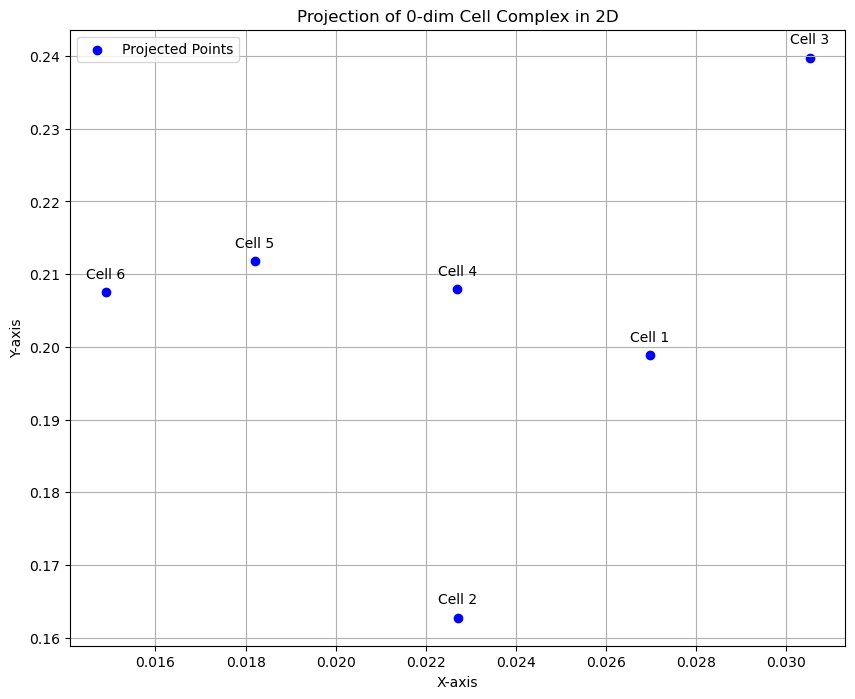

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import topoembedx as tex
import toponetx as tnx

# Create a cell complex object with a few cells
cc = tnx.classes.CellComplex([[1, 2, 3, 4, 5], [4, 5, 6]], ranks=2)

# Create a model
model = tex.DeepCell()

# Fit the model to the cell complex
model.fit(cc, neighborhood_type="adj", neighborhood_dim={"dim": 0, "codim": -1})

# Get the embeddings
embedded_points = model.get_embedding(get_dict=True)

# Prepare data for plotting
x = [embedded_points[cell][0] for cell in embedded_points]
y = [embedded_points[cell][1] for cell in embedded_points]
cell_labels = [f"Cell {cell}" for cell in embedded_points]

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c="blue", label="Projected Points")

# Annotate the points to correspond with cells
for i, label in enumerate(cell_labels):
    plt.annotate(
        label, (x[i], y[i]), textcoords="offset points", xytext=(0, 10), ha="center"
    )

# Label axes and add title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Projection of 0-dim Cell Complex in 2D")

# Display the plot
plt.legend()
plt.grid(True)
plt.show()

### Preservation of Neighborhoodness:
The neighborhoodness of the vertices in the original 0-dimensional cell complex is preserved in the projection. Vertices that were close to each other in the original cell complex will also be close to each other in the 2D projection. This is a key feature of topological embeddings - maintaining the topological relationships and structures in the lower-dimensional projection. The proximity of points (representing vertices) in the scatter plot reflects the neighborhood relationships of the vertices in the original 0-dimensional cell complex, as captured by the DeepCell projection algorithm.

In [42]:
### Embedding of edges in a cell complex using DeepCell

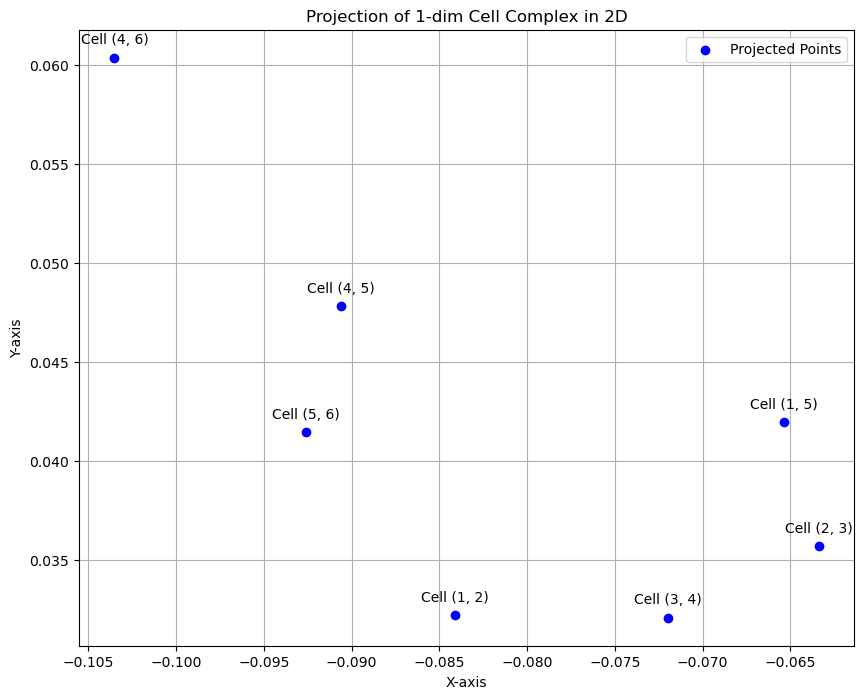

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import topoembedx as tex
import toponetx as tnx

# Create a cell complex object with a few cells
cc = tnx.classes.CellComplex([[1, 2, 3, 4, 5], [4, 5, 6]], ranks=2)

# Create a model
model = tex.DeepCell()

# Fit the model to the cell complex
model.fit(cc, neighborhood_type="adj", neighborhood_dim={"dim": 1, "codim": -1})

# Get the embeddings
embedded_points = model.get_embedding(get_dict=True)

# Prepare data for plotting
x = [embedded_points[cell][0] for cell in embedded_points]
y = [embedded_points[cell][1] for cell in embedded_points]
cell_labels = [f"Cell {cell}" for cell in embedded_points]

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c="blue", label="Projected Points")

# Annotate the points to correspond with cells
for i, label in enumerate(cell_labels):
    plt.annotate(
        label, (x[i], y[i]), textcoords="offset points", xytext=(0, 10), ha="center"
    )

# Label axes and add title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Projection of 1-dim Cell Complex in 2D")

# Display the plot
plt.legend()
plt.grid(True)
plt.show()

The preservation of neighborhoodness in the projection for edges is similar to that for vertices. Edges that were close to each other in the original 1-dimensional cell complex (connected vertices) will also be close to each other in the 2D projection, reflecting their topological relationships.